In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

from exact import LMG_small_spins, LMG_big_spins, lanczos_ed

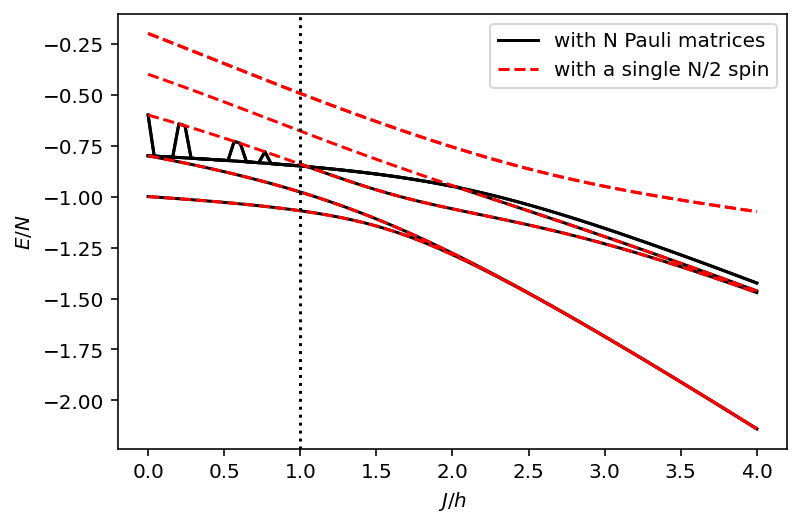

In [2]:
N = 10
h = 1
Js = np.linspace(0, 4, 100)

energies_small = []
energies_big = []
for J in Js:
    H_small = LMG_small_spins(J, h, N)
    vals = lanczos_ed(H_small, k=5)
    energies_small.append(vals / N)
    
    H_big = LMG_big_spins(J, h, N/2)
    vals = lanczos_ed(H_big, k=5)
    energies_big.append(vals / N)
    
energies_small = np.array(energies_small)
energies_big = np.array(energies_big)

plt.plot(Js, energies_small, c='k')
plt.plot(Js, energies_small[:, -1], c='k', label='with N Pauli matrices') # replot for single label
plt.plot(Js, energies_big, c='r', ls='dashed')
plt.plot(Js, energies_big[:, -1], c='r', ls='dashed', label='with a single N/2 spin') # replot for single label
plt.axvline(1, c='k', ls='dotted')
plt.xlabel(r'$J/h$')
plt.ylabel(r'$E/N$')
plt.legend()
plt.show()
    